In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [25]:
df = pd.read_csv('dataset_final_label.csv')
df.head()


,kabupaten,Label,Cluster,harga_cabai,gkg,kemiskinan,stunting,air_bersih
0,Bogor,Rawan,2,2068828.0,581.459,7.27,27.6,91.90
1,Sukabumi,Rawan,2,3177488.0,577.924,7.01,27.0,85.72
2,Cianjur,Rentan,1,2407098.0,597.618,10.22,11.4,85.65
3,Bandung,Rentan,1,3366008.0,661.105,6.40,29.2,95.73
4,Garut,Rawan,2,3107854.0,619.998,9.77,24.1,81.13


In [44]:
features = ['harga_cabai', 'gkg', 'kemiskinan', 'stunting', 'air_bersih']
label_counts = df['Label'].value_counts()

## EDA

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9916\2922398668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette={'Aman':'blue', 'Rentan':'orange', 'Rawan':'red'})


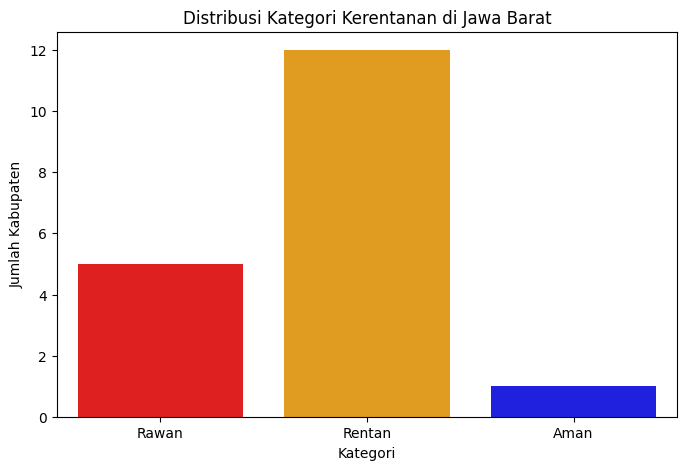

In [39]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Label', palette={'Aman':'blue', 'Rentan':'orange', 'Rawan':'red'})
plt.title('Distribusi Kategori Kerentanan di Jawa Barat')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Kabupaten')
plt.show()

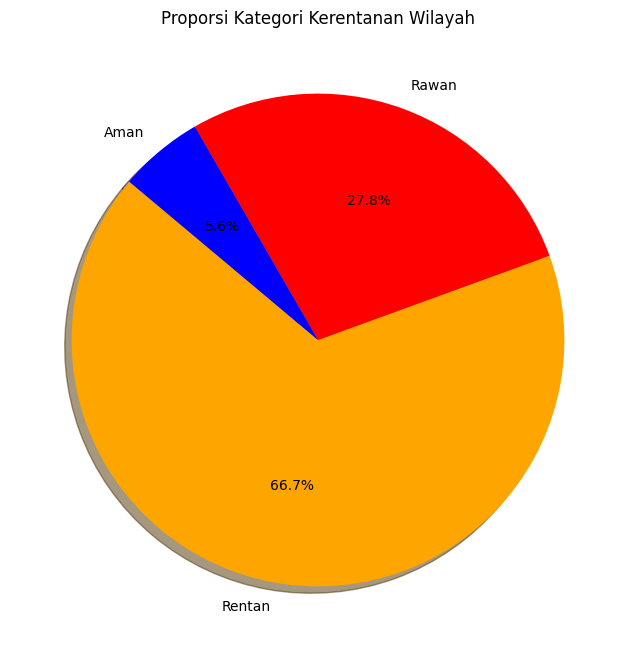

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(
    label_counts, 
    labels=label_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['orange', 'red', 'blue'], # Sesuaikan urutan: biasanya Rentan paling banyak
    shadow=True
)

plt.title('Proporsi Kategori Kerentanan Wilayah')
plt.show()

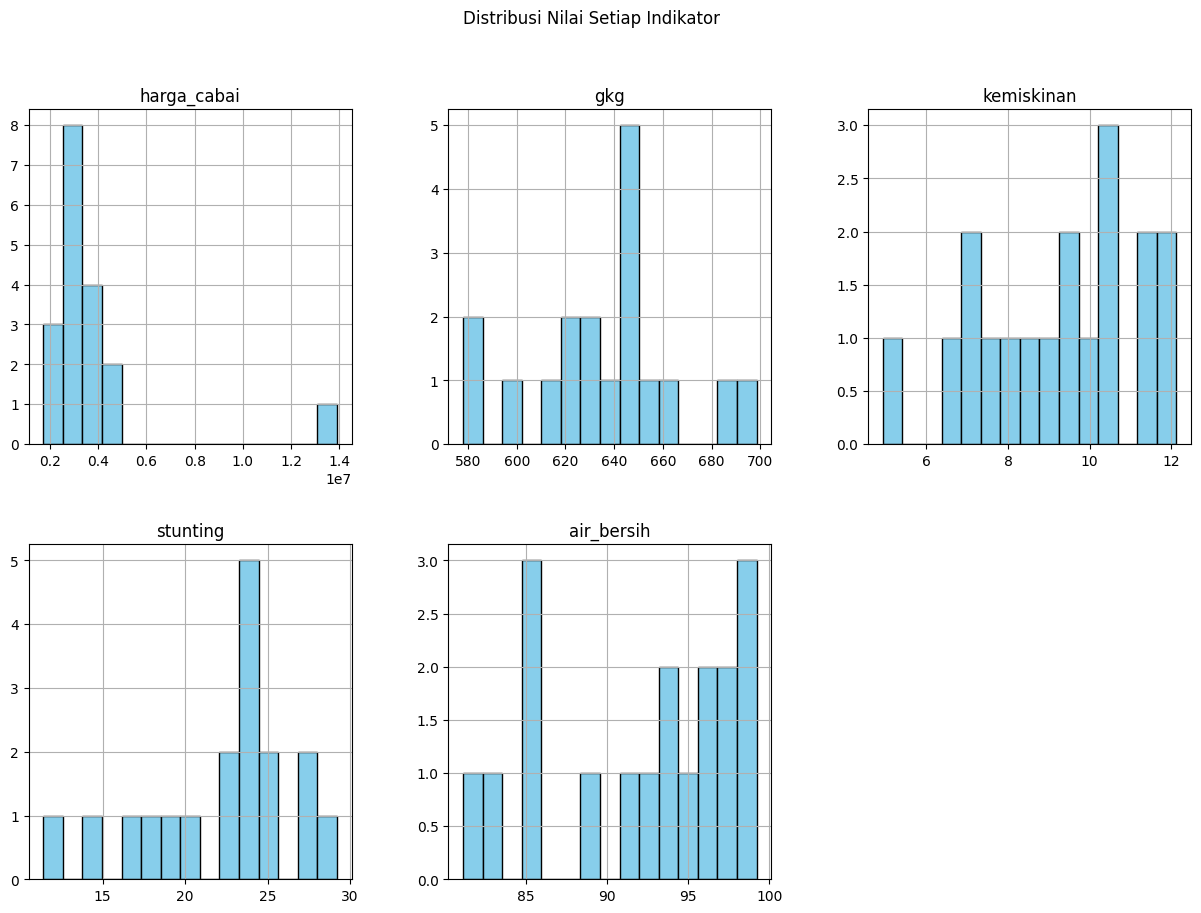

In [41]:
features = ['harga_cabai', 'gkg', 'kemiskinan', 'stunting', 'air_bersih']
df[features].hist(bins=15, figsize=(15, 10), layout=(2, 3), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Nilai Setiap Indikator')
plt.show()

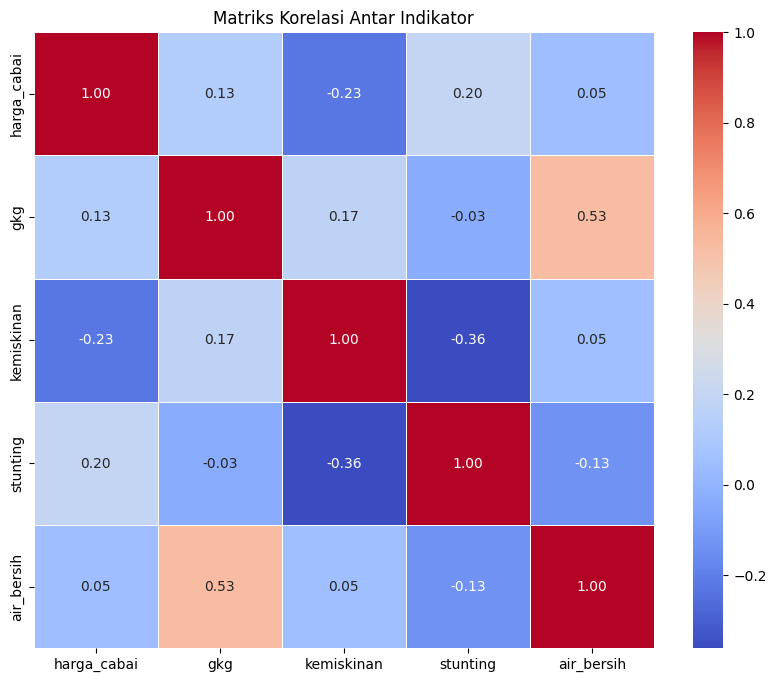

In [40]:
plt.figure(figsize=(10, 8))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Indikator')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9916\3170729052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label', y=col, ax=axes[i], palette={'Aman':'blue', 'Rentan':'orange', 'Rawan':'red'})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9916\3170729052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label', y=col, ax=axes[i], palette={'Aman':'blue', 'Rentan':'orange', 'Rawan':'red'})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9916\3170729052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Label'

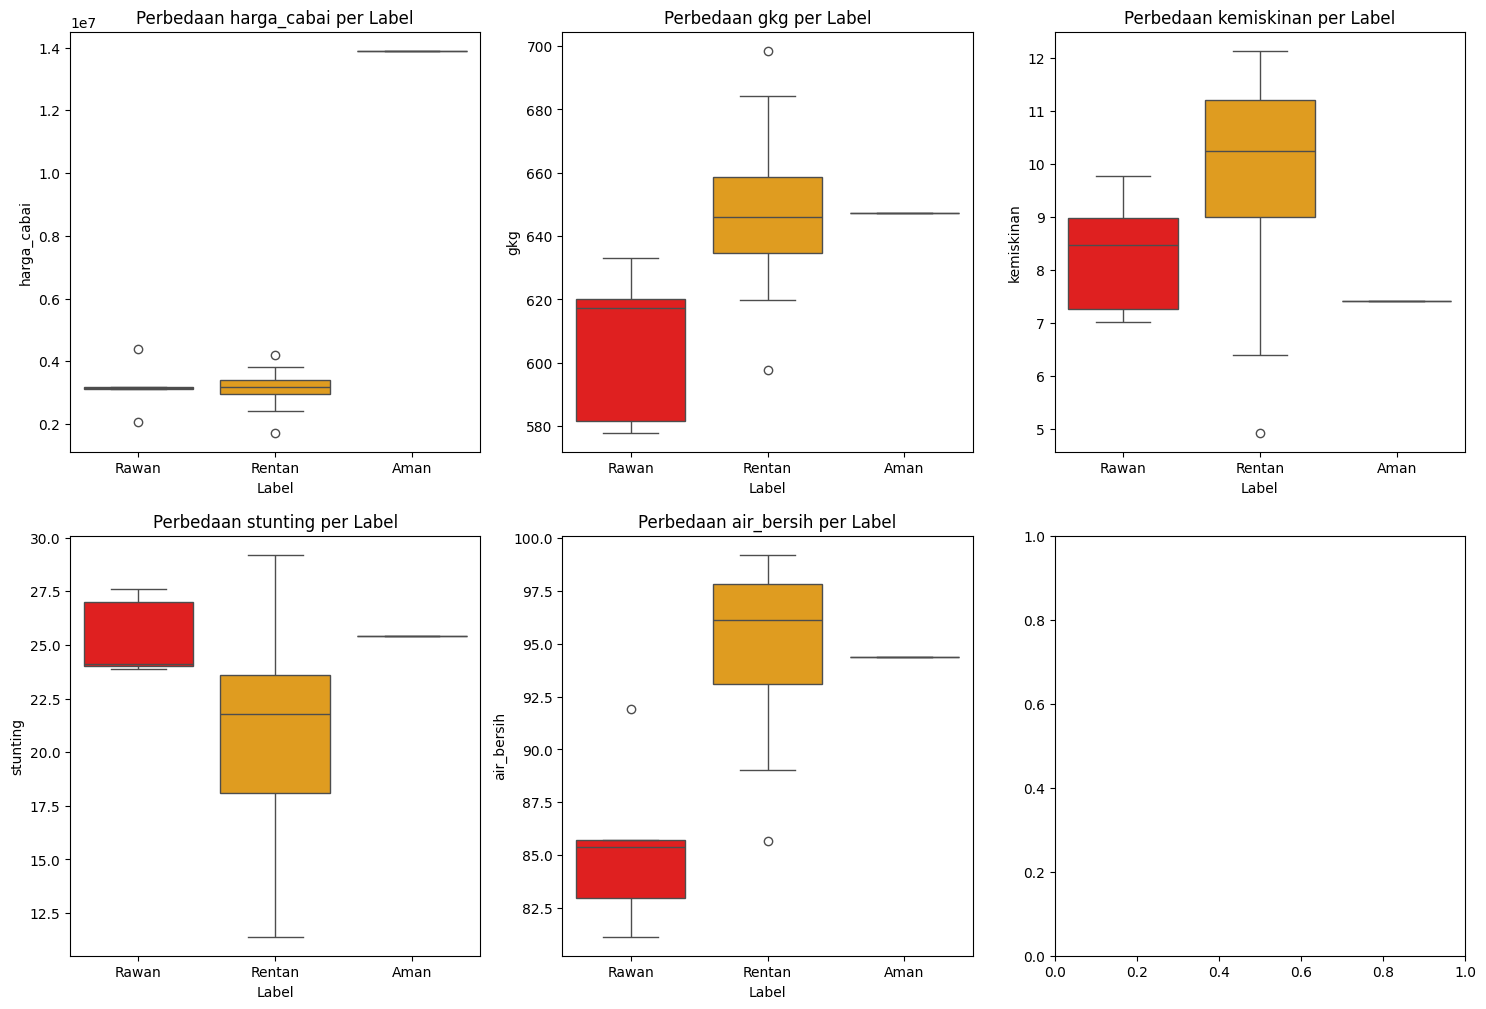

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(data=df, x='Label', y=col, ax=axes[i], palette={'Aman':'blue', 'Rentan':'orange', 'Rawan':'red'})
    axes[i].set_title(f'Perbedaan {col} per Label')


if len(features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [28]:
x = df.iloc[:, [3, 4, 5, 6, 7]].values
y = df.iloc[:, 2].values
print(x)


[[2.068828e+06 5.814590e+02 7.270000e+00 2.760000e+01 9.190000e+01]
 [3.177488e+06 5.779240e+02 7.010000e+00 2.700000e+01 8.572000e+01]
 [2.407098e+06 5.976180e+02 1.022000e+01 1.140000e+01 8.565000e+01]
 [3.366008e+06 6.611050e+02 6.400000e+00 2.920000e+01 9.573000e+01]
 [3.107854e+06 6.199980e+02 9.770000e+00 2.410000e+01 8.113000e+01]
 [3.409806e+06 6.579890e+02 1.028000e+01 2.070000e+01 8.903000e+01]
 [1.389596e+07 6.471600e+02 7.420000e+00 2.540000e+01 9.439000e+01]
 [3.103935e+06 6.467880e+02 1.212000e+01 2.340000e+01 9.657000e+01]
 [1.725000e+06 6.449980e+02 1.120000e+01 2.290000e+01 9.852000e+01]
 [4.191146e+06 6.498390e+02 1.121000e+01 2.410000e+01 9.338000e+01]
 [3.024028e+06 6.338170e+02 9.360000e+00 1.440000e+01 9.542000e+01]
 [2.868542e+06 6.985300e+02 1.213000e+01 1.840000e+01 9.777000e+01]
 [3.825278e+06 6.199690e+02 9.520000e+00 1.870000e+01 9.922000e+01]
 [3.157722e+06 6.331610e+02 8.460000e+00 2.400000e+01 8.540000e+01]
 [2.991667e+06 6.349300e+02 7.870000e+00 1.71000

In [29]:
print(y)

[2 2 1 1 2 1 0 1 1 1 1 1 1 2 1 1 1 2]


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [13]:
print(x_train)

[[3.157722e+06 6.331610e+02 8.460000e+00 2.400000e+01 8.540000e+01]
 [3.232716e+06 6.454430e+02 1.052000e+01 2.510000e+01 9.227000e+01]
 [3.413935e+06 6.842620e+02 4.930000e+00 2.320000e+01 9.695000e+01]
 [2.868542e+06 6.985300e+02 1.213000e+01 1.840000e+01 9.777000e+01]
 [2.407098e+06 5.976180e+02 1.022000e+01 1.140000e+01 8.565000e+01]
 [4.191146e+06 6.498390e+02 1.121000e+01 2.410000e+01 9.338000e+01]
 [4.391250e+06 6.171530e+02 8.980000e+00 2.390000e+01 8.295000e+01]
 [3.107854e+06 6.199980e+02 9.770000e+00 2.410000e+01 8.113000e+01]
 [3.825278e+06 6.199690e+02 9.520000e+00 1.870000e+01 9.922000e+01]
 [3.103935e+06 6.467880e+02 1.212000e+01 2.340000e+01 9.657000e+01]
 [3.024028e+06 6.338170e+02 9.360000e+00 1.440000e+01 9.542000e+01]
 [2.991667e+06 6.349300e+02 7.870000e+00 1.710000e+01 9.811000e+01]
 [1.389596e+07 6.471600e+02 7.420000e+00 2.540000e+01 9.439000e+01]]


In [14]:
len(x_train)

13

In [7]:
len(x)

18

In [15]:
len(x_test)

5

In [16]:
print(y_train)

[2 1 1 1 1 1 2 2 1 1 1 1 0]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
print(x_train)

[[-0.33681929 -0.28794506 -0.50422441  0.68558299 -1.13790539]
 [-0.31067653  0.18323133  0.57343958  0.9382592   0.00383521]
 [-0.24750395  1.67245104 -2.35090105  0.50181848  0.78161482]
 [-0.43762686  2.21981668  1.41569153 -0.6007686   0.91789245]
 [-0.59848532 -1.65148704  0.41649822 -2.2087081  -1.09635733]
 [ 0.02343026  0.3518758   0.9344047   0.70855356  0.18830858]
 [ 0.09318612 -0.90206261 -0.23219273  0.66261243 -1.54507634]
 [-0.35420317 -0.79291941  0.18108618  0.70855356 -1.8475462 ]
 [-0.10411059 -0.79403194  0.05030172 -0.53185691  1.15887118]
 [-0.35556933  0.23482979  1.41046015  0.54775961  0.71846178]
 [-0.38342475 -0.26277883 -0.03340034 -1.51959117  0.52734072]
 [-0.39470573 -0.22008063 -0.81287575 -0.89938594  0.97439781]
 [ 3.40650913  0.24910088 -1.04828779  1.00717089  0.35616273]]


In [19]:
print(x_test)

[[-0.71640557 -2.27139743 -1.12675847  1.5125233  -0.05765592]
 [-0.3299289  -2.40701122 -1.26277431  1.37469992 -1.08472388]
 [-0.83626333  0.16615972  0.92917332  0.43290679  1.04253662]
 [-0.24894331  0.6645356   0.44788649 -0.07244563 -0.53462761]
 [-0.2642112   0.78407522 -1.5818884   1.88005233  0.57886031]]


In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [100]:
y_pred = classifier.predict(x_test)

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0]
 [0 2]]


In [103]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [104]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred) 
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :100 persen


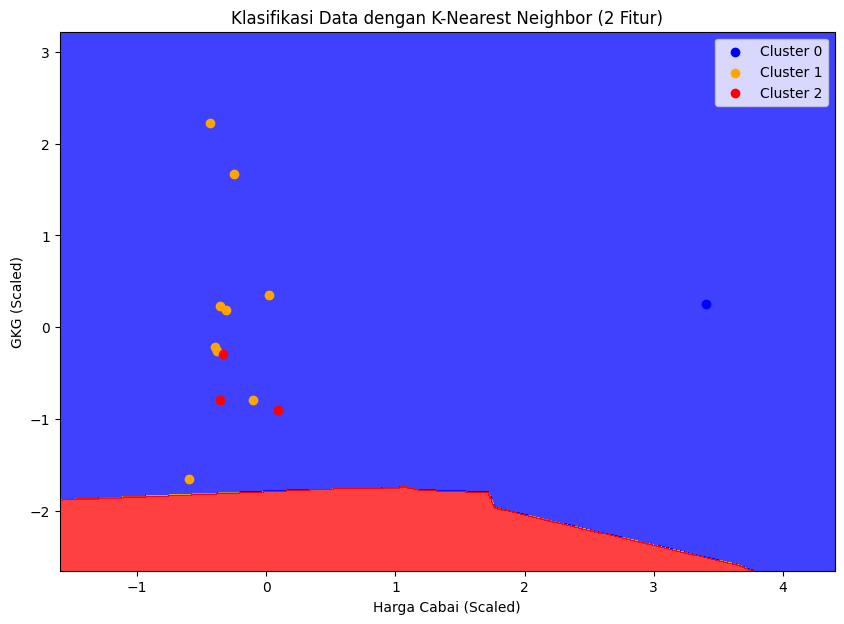

In [30]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train[:, [0, 1]], y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
mean_3 = x_train[:, 2].mean()
mean_4 = x_train[:, 3].mean()
mean_5 = x_train[:, 4].mean()

x_pred_dummy = np.array([X1.ravel(), X2.ravel(),
                         np.full_like(X1.ravel(), mean_3), 
                         np.full_like(X1.ravel(), mean_4), 
                         np.full_like(X1.ravel(), mean_5)]).T

Z = classifier.predict(x_pred_dummy).reshape(X1.shape)
plt.figure(figsize=(10, 7))
cmap_list = ListedColormap(('blue', 'orange', 'red'))
plt.contourf(X1, X2, Z, alpha = 0.75, cmap = cmap_list)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
    
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = [cmap_list(i)], label = f'Cluster {j}')
plt.title('Klasifikasi Data dengan K-Nearest Neighbor (2 Fitur)')
plt.xlabel('Harga Cabai (Scaled)')
plt.ylabel('GKG (Scaled)')
plt.legend()
plt.show()

In [ ]:
import joblib 

file_name = 'dataset_final_label.csv'
df = pd.read_csv(file_name)

df['harga_cabai'] = df['harga_cabai'].astype(str).str.replace('.', '', regex=False).astype(float)

features = ['harga_cabai', 'gkg', 'kemiskinan', 'stunting', 'air_bersih']
X = df[features]
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, 'scaler_final.joblib')

label_encoder = {'Aman': 0, 'Rentan': 1, 'Rawan': 2}
y_encoded = y.map(label_encoder)

knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_scaled, y_encoded)

joblib.dump(knn_final, 'knn_final_model.joblib')

print("Proses penyimpanan selesai. Kedua file telah dibuat.")

Proses penyimpanan selesai. Kedua file telah dibuat.
